# Data visualizer for all participants in AV_experiment
Ignore first part, its just housekeeping

In [53]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns
from statannot import add_stat_annotation

sns.set()
sns.set_theme()

In [54]:
# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [55]:
#read in source csv
df = pd.read_csv(r'data/results_pavlovia.csv', encoding='utf-8-sig', 
                  low_memory=False
                 )

In [56]:
df

,cont_4.rt,latency,corrAns,key_resp.rt,OS,exit.rt,cont_3.rt,response_distortion.keys,trial_counter_choice,response_distortion.rt,...,__session,globalClockTime,trials.thisIndex,trials.ran,cont_1.rt,SJ_trials_after.thisIndex,__experimentName,trials.thisTrialN,training.thisN,yResolution
0,﻿,NaN,NaN,NaN,Win32,NaN,NaN,NaN,NaN,NaN,...,SESSION,NaN,NaN,NaN,4.554125,NaN,av_experiment,NaN,NaN,1080
1,﻿0.9517700000433251,0.0,NaN,NaN,Win32,NaN,1.033725,NaN,NaN,NaN,...,SESSION,NaN,NaN,NaN,NaN,NaN,av_experiment,NaN,0.0,1080
2,﻿,10.0,NaN,NaN,Win32,NaN,NaN,NaN,NaN,NaN,...,SESSION,NaN,NaN,NaN,NaN,NaN,av_experiment,NaN,1.0,1080
3,﻿,0.0,NaN,NaN,Win32,NaN,NaN,NaN,NaN,NaN,...,SESSION,NaN,NaN,NaN,NaN,NaN,av_experiment,NaN,2.0,1080
4,﻿,400.0,NaN,NaN,Win32,NaN,NaN,NaN,NaN,NaN,...,SESSION,NaN,NaN,NaN,NaN,NaN,av_experiment,NaN,3.0,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,﻿,10.0,NaN,NaN,Win32,NaN,NaN,right,NaN,0.470,...,SESSION,1634.489,NaN,NaN,NaN,3.0,av_experiment,NaN,NaN,1080
15892,﻿,0.0,NaN,NaN,Win32,NaN,NaN,left,NaN,0.529,...,SESSION,1639.982,NaN,NaN,NaN,6.0,av_experiment,NaN,NaN,1080
15893,﻿,0.0,NaN,NaN,Win32,NaN,NaN,right,NaN,0.447,...,SESSION,1646.074,NaN,NaN,NaN,5.0,av_experiment,NaN,NaN,1080
15894,﻿,0.0,NaN,NaN,Win32,NaN,NaN,right,NaN,0.377,...,SESSION,1651.233,NaN,NaN,NaN,7.0,av_experiment,NaN,NaN,1080


## Data repair

# Correct BOM
group = []
for x in df['group']:

    if x == '\ufeff':
        group.append(np.nan)
    elif x == '\ufeff0':
        group.append(0)
    elif x == '\ufeff1':
        group.append(1)
    elif x == '\ufeff2':
        group.append(2)
    elif x == '\ufeff3':
        group.append(3)
    elif x == '\ufeff4':
        group.append(4)

group = pd.Series(group)

df['group'] = group

In [57]:
df['participant'].unique()

array([  5,  15,  20,  22,  36,  37,  42,  45,  47,  49,  51,  53,  56,
        57,  59,  60,  63,  64,  71,  73,  76,  77,  79,  82,  83,  88,
        90,  89,  91,  94,  97,  98,  99, 101, 102, 103, 107, 108, 110,
       112, 113, 114, 120, 121, 122, 123, 127, 138, 139, 143, 148, 151,
       154, 155, 162, 163, 166, 152, 167, 168, 169, 170, 171, 173, 174,
       175, 176, 178, 180, 181, 182, 183, 184, 187, 190, 191, 192, 193,
       194, 196], dtype=int64)

In [58]:
# Invert wrong results for even participants
p_invert = [20,22,36,42,56,60,64,76,82,88,90,94,98,102,108,110,112,114,120,122,138,148,152,154,162,166,168,170,174,176,178,180,182,184]
for p in p_invert:
    inverted = df.loc[(df['participant'] == p) & (df['trials.ran'] == 1), ['choice_response.corr']].replace(to_replace = {0: 1, 1:0})
    df.loc[(df['participant'] == p) & (df['trials.ran'] == 1), ['choice_response.corr']] = inverted



## Participant exclusion

In [63]:
# Exclude Participants 
p_exclude= [5, 15, 20, 22, 36, 37, 47,79,90] # 5 was me, 47 performed bad
for p in p_exclude:
    df = df[df['participant'] != p] 


In [ ]:
# show all participants with performance under 80 percent


## save corrected df to csv


In [59]:
df.to_csv(r'data/corr_results.csv',  header=True, encoding='utf-8-sig')

In [60]:
 df_test = df.loc[df['id'] == 'test']
    
    #count participants
parts_test = df_test['participant'].unique()
print('Number of participants: ', len(parts_test))
print('Their IDs: ', parts_test)

Number of participants:  6
Their IDs:  [ 5 15 20 22 36 37]


In [61]:
 df_pilot = df.loc[df['id'] == 'pilot']
    
    #count participants
parts_pilot = df_pilot['participant'].unique()
print('Number of participants: ', len(parts_pilot))
print('Their IDs: ', parts_pilot)

Number of participants:  12
Their IDs:  [42 45 47 49 51 53 56 57 59 60 63 64]


In [62]:
 df_public = df.loc[df['id'] == 'public']
    
    #count participants
parts_public = df_public['participant'].unique()
print('Number of participants: ', len(parts_public))
print('Their IDs: ', parts_public)

Number of participants:  62
Their IDs:  [ 71  73  76  77  79  82  83  88  90  89  91  94  97  98  99 101 102 103
 107 108 110 112 113 114 120 121 122 123 127 138 139 143 148 151 154 155
 162 163 166 152 167 168 169 170 171 173 174 175 176 178 180 181 182 183
 184 187 190 191 192 193 194 196]


## General Information
Here a an overview over participant data is intended, without looking at main effects

Number of participants:  71
Their IDs:  [ 42  45  49  51  53  56  57  59  60  63  64  71  73  76  77  82  83  88
  89  91  94  97  98  99 101 102 103 107 108 110 112 113 114 120 121 122
 123 127 138 139 143 148 151 154 155 162 163 166 152 167 168 169 170 171
 173 174 175 176 178 180 181 182 183 184 187 190 191 192 193 194 196]


No handles with labels found to put in legend.


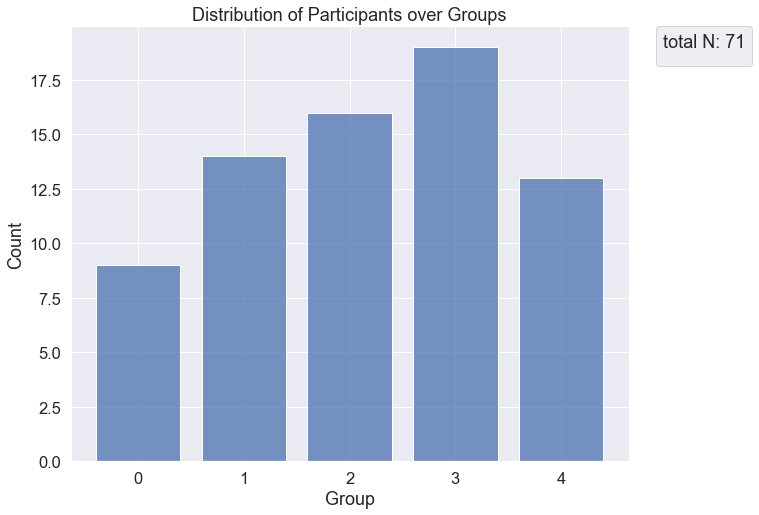

In [64]:
#count participants
parts = df['participant'].unique()
print('Number of participants: ', len(parts))
print('Their IDs: ', parts)
#group distribution
groups=[]
for p in parts:
    group = df[df['participant'] == p]['group'].median()
    groups.append(group)
groups

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


sns.histplot( data=groups, 
             stat = 'count',
             #multiple="dodge", 
             discrete = True,
             shrink=.8
            ).set_xticks(groupnames)

# Change Axis labels:
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Distribution of Participants over Groups')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='total N: ' + str(len(parts)))

plt.savefig("figures/group_spread.png", dpi=300, bbox_inches='tight')


No handles with labels found to put in legend.


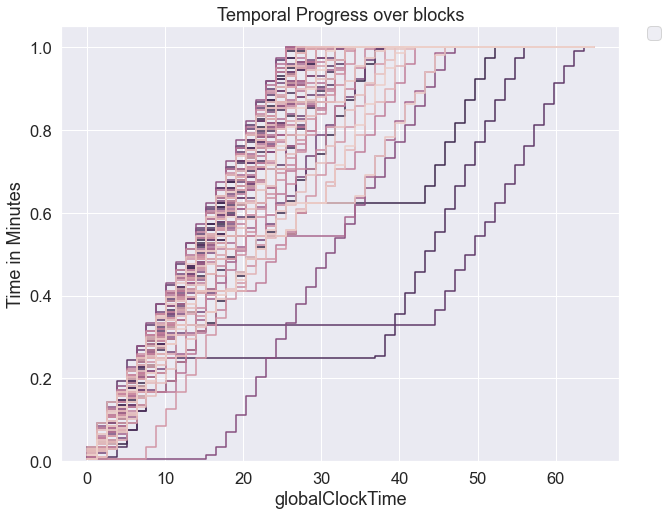

In [65]:
# plot time needed
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

time = df['globalClockTime'] / 60


sns.histplot( data=df, 
             x = time ,
             hue = 'participant',
             cumulative = True,
             element="step", fill=False,
             stat="density", 
             common_norm=False,
            )


#plt.xlabel('Group')
plt.ylabel('Progress')
plt.ylabel('Time in Minutes')
plt.title('Temporal Progress over blocks')
plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/time_all_p.png", dpi=300, bbox_inches='tight')


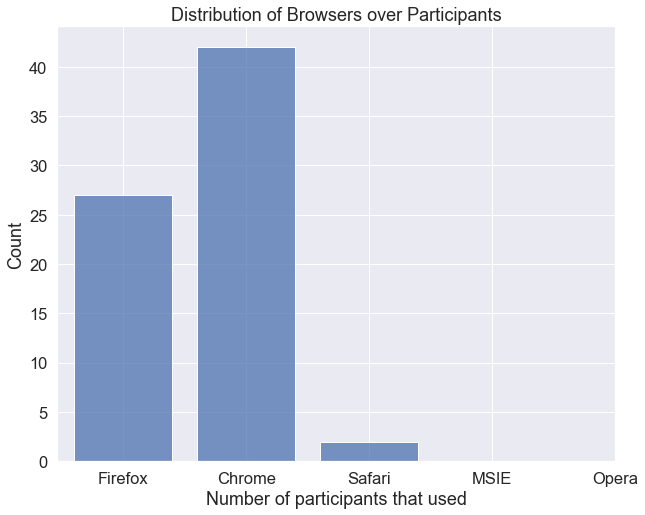

In [66]:
#browser distribution
browsers=[]
for p in parts:
    browser = df[df['participant'] == p]['browser'].any()
    browsers.append(browser)
browsers


fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.histplot( data=browsers, 
             multiple="dodge", 
             shrink=.8).set_xticks(browsernames)

plt.xlabel('Number of participants that used')
plt.ylabel('Count')
plt.title('Distribution of Browsers over Participants')

plt.savefig("figures/browser_dist.png", dpi=300, bbox_inches='tight')

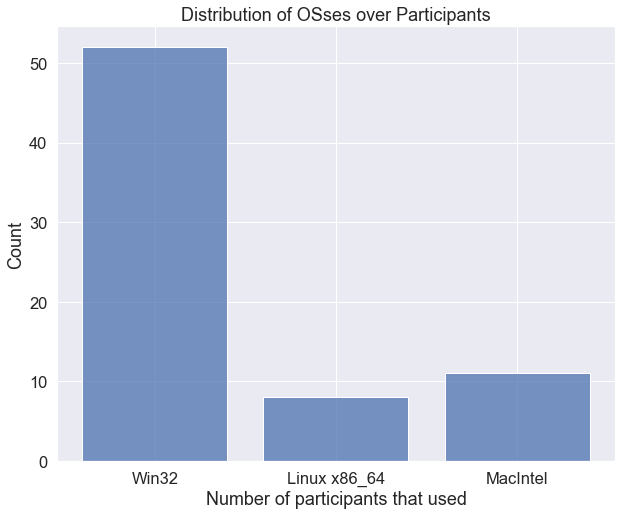

In [67]:
#OS distribution
osses=[]
for p in parts:
    os = df[df['participant'] == p]['OS'].any()
    osses.append(os)
osses

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.histplot( data=osses, 
            stat = 'count',
             #multiple="dodge", 
             discrete = True,
             multiple="dodge", 
             shrink=.8)

# Change Axis labels:

plt.xlabel('Number of participants that used')
plt.ylabel('Count')
plt.title('Distribution of OSses over Participants')

plt.savefig("figures/os_dist.png", dpi=300, bbox_inches='tight')

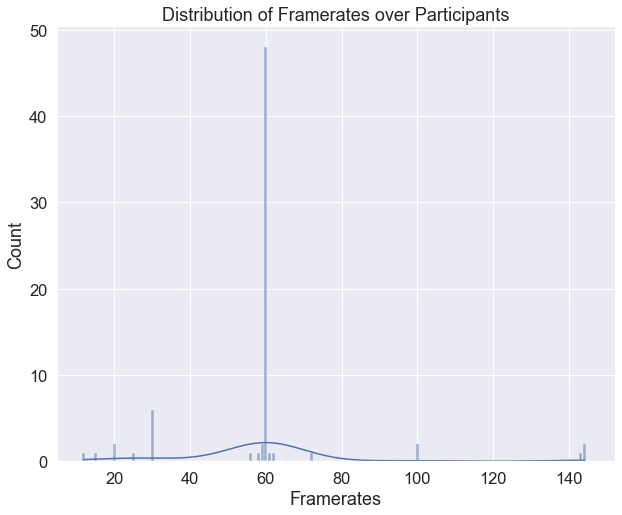

In [68]:
#framerate distribution
framerates=[]
for p in parts:
    fr = df.loc[df['participant'] == p,['frameRate']]
    framerates.append(fr.iloc[0,0])
    
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.histplot( data=framerates, 
            stat = 'count',
             #multiple="dodge", 
             discrete = True,
             multiple="dodge", 
             shrink=.8,
            kde = True)

# Change Axis labels:

plt.xlabel('Framerates')
plt.ylabel('Count')
plt.title('Distribution of Framerates over Participants')
plt.savefig("figures/fr_dist.png", dpi=300, bbox_inches='tight')

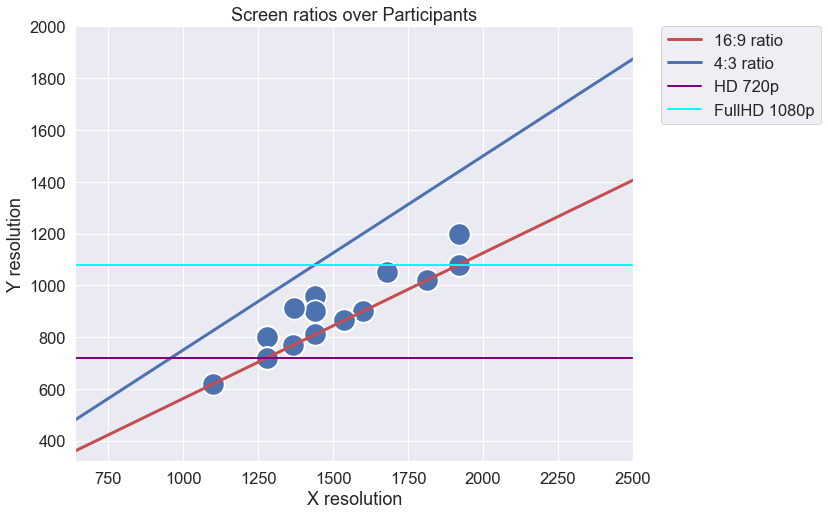

In [69]:
#resolution distribution
ressesX=[]
ressesY = []
for p in parts:
    resX = df[df['participant'] == p]['xResolution'].iloc[0]
    resY = df[df['participant'] == p]['yResolution'].iloc[0]
    ressesX.append(resX)
    ressesY.append(resY)


fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.scatterplot(x= ressesX,
                    y = ressesY,
                    s = 500,
                   )

ax.axline((0,0), slope = 9/16, linewidth=3, color='r', label = '16:9 ratio')
ax.axline((0,0), slope = 3/4, linewidth=3, color='b', label = '4:3 ratio')
ax.axhline(720, linewidth=2, color='purple', label = 'HD 720p')
ax.axhline(1080, linewidth=2, color='cyan', label = 'FullHD 1080p')


ax.set(xlim=(640,2500))
ax.set(ylim=(320,2000))

# Change Axis labels:

plt.xlabel('X resolution')
plt.ylabel('Y resolution')
plt.title('Screen ratios over Participants')

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/resolutions.png", dpi=300, bbox_inches='tight')

# Analysis of choice trial
Core hypotheses: 
    RT in condition 0,1 and 3 is equivalent, 
    conditions 2 and 4 have larger RT. 
    Analogous for accuracy

## RT in choice Trial
Ideally, we can see 2 distinct peaks here, 1 close to 0 when the target was the first and a bigger one around 3 secs, where the second entity is known.

In [70]:
### Divide data into subsets correct / incorrect

# Filter out incorrect responses
df_corr = df.drop(df[df['choice_response.corr'] == 0].index)
df_corr = df_corr.drop(df_corr[df_corr['target_loc'] == 2].index)
#df_corr.shape

# Filter out correct responses
df_incorr = df.drop(df[df['choice_response.corr'] == 1].index)
df_incorr = df_incorr.drop(df_incorr[df_incorr['target_loc'] == 2].index)
#df_incorr.shape

# Only Filler trials
df_filler = df.drop(df[df['target_loc'] < 2].index)
#df_filler['target_loc'].unique()
# Only Filler trials
df_no_filler = df.drop(df[df['target_loc'] == 2].index)

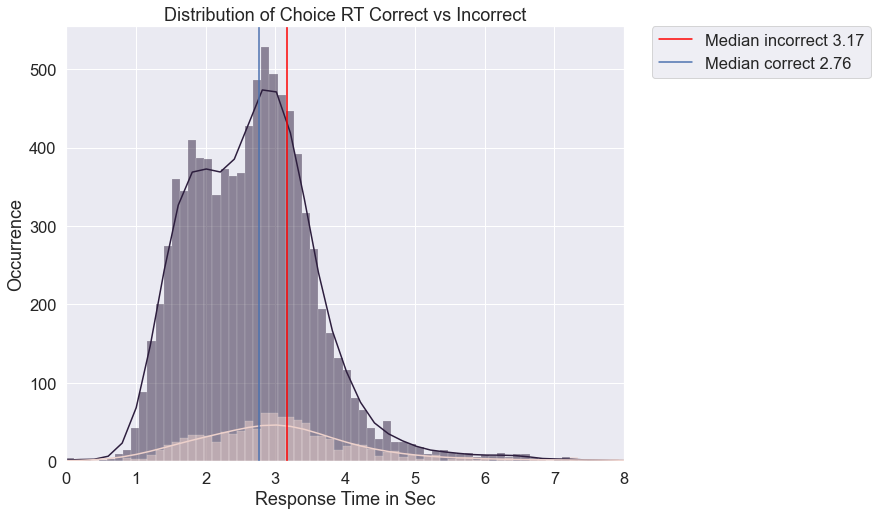

In [71]:
mean0 = df.loc[df['choice_response.corr'] == 0]['choice_response.rt'].mean().round(2)
mean1 = df.loc[df['choice_response.corr'] == 1]['choice_response.rt'].mean().round(2)
median0 = df.loc[df['choice_response.corr'] == 0]['choice_response.rt'].median().round(2)
median1 = df.loc[df['choice_response.corr'] == 1]['choice_response.rt'].median().round(2)

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.histplot(data = df_no_filler,
             x = 'choice_response.rt',
             hue = 'choice_response.corr',
            #col = 'imagePos',
            # label = ,
            kde=True)

ax.axvline(median0,label = 'Median incorrect ' + str(median0), 
           color = 'red'
          )
ax.axvline(median1,label = 'Median correct ' + str(median1),
         #  color = 'green'
          )

ax.set(xlim=(0, 8))


# Change Axis labels:
plt.xlabel('Response Time in Sec')
plt.ylabel('Occurrence')
plt.title('Distribution of Choice RT Correct vs Incorrect')
plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/rt_choice_corr_vs_incorr.png", dpi=300, bbox_inches='tight')

## Data filtering

In [72]:
mean0 = df.loc[df['target_loc'] == 0]['choice_response.rt'].mean().round(2)
mean1 = df.loc[df['target_loc'] == 1]['choice_response.rt'].mean().round(2)
mean2 = df.loc[df['target_loc'] == 2]['choice_response.rt'].mean().round(2)

median0 = df.loc[df['target_loc'] == 0]['choice_response.rt'].median().round(2)
median1 = df.loc[df['target_loc'] == 1]['choice_response.rt'].median().round(2)
median2 = df.loc[df['target_loc'] == 2]['choice_response.rt'].median().round(2)

print('Mean and Median when Target left: ', mean0, median0)
print('Mean and Median when Target right: ', mean1, median1)
print('Mean and Median when Target wrong: ', mean2, median2)

Mean and Median when Target left:  2.33 2.02
Mean and Median when Target right:  3.26 3.08
Mean and Median when Target wrong:  3.5 3.35


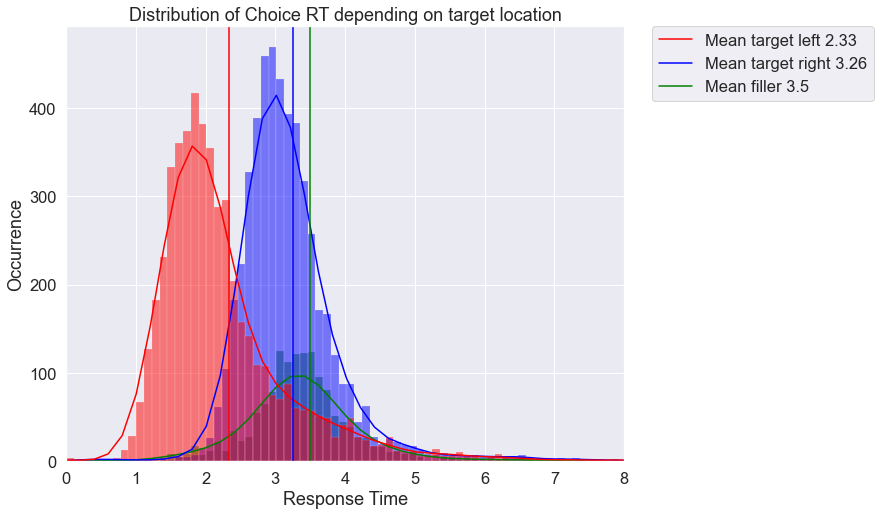

In [73]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.histplot(data = df,
             x = 'choice_response.rt',
             hue = 'target_loc',
             #label=["Target left", 'Target right', 'filler'],
                  legend = True,
            kde=True,
                 palette = ['red','blue','green'])

ax.axvline(mean0,label = 'Mean target left ' + str(mean0), 
           color = 'red'
          )
ax.axvline(mean1,label = 'Mean target right ' + str(mean1),
           color = 'blue'
          )
ax.axvline(mean2,label = 'Mean filler ' + str(mean2), 
           color = 'green'
          )
ax.set(xlim=(0, 8))

#plt.legend()

# Change Axis labels:
plt.xlabel('Response Time')
plt.ylabel('Occurrence')
plt.title('Distribution of Choice RT depending on target location')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/rt_choice_by_location.png", dpi=300, bbox_inches='tight')

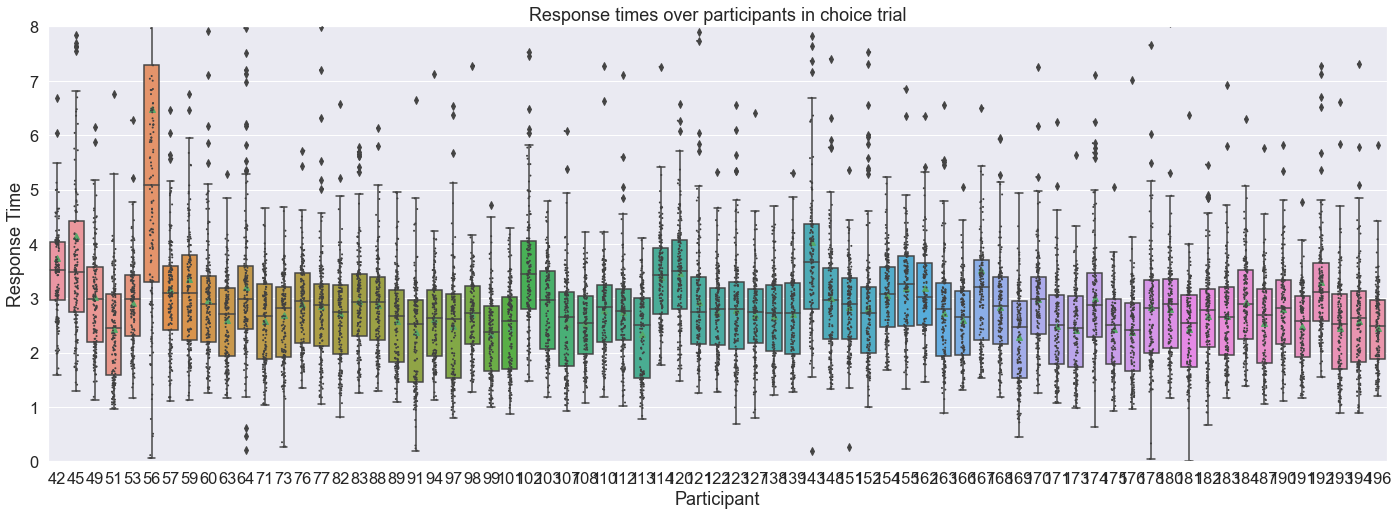

In [74]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(24, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="participant",
                 data=df,
                showmeans=True)

sns.stripplot(y='choice_response.rt', 
                 x="participant",
                 data=df,
             color=".25",
             size = 2)
ax.set(ylim=(0, 8))

# Change Axis labels:
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('Response times over participants in choice trial')

plt.savefig("figures/rt_choice_by_participant.png", dpi=300, bbox_inches='tight')

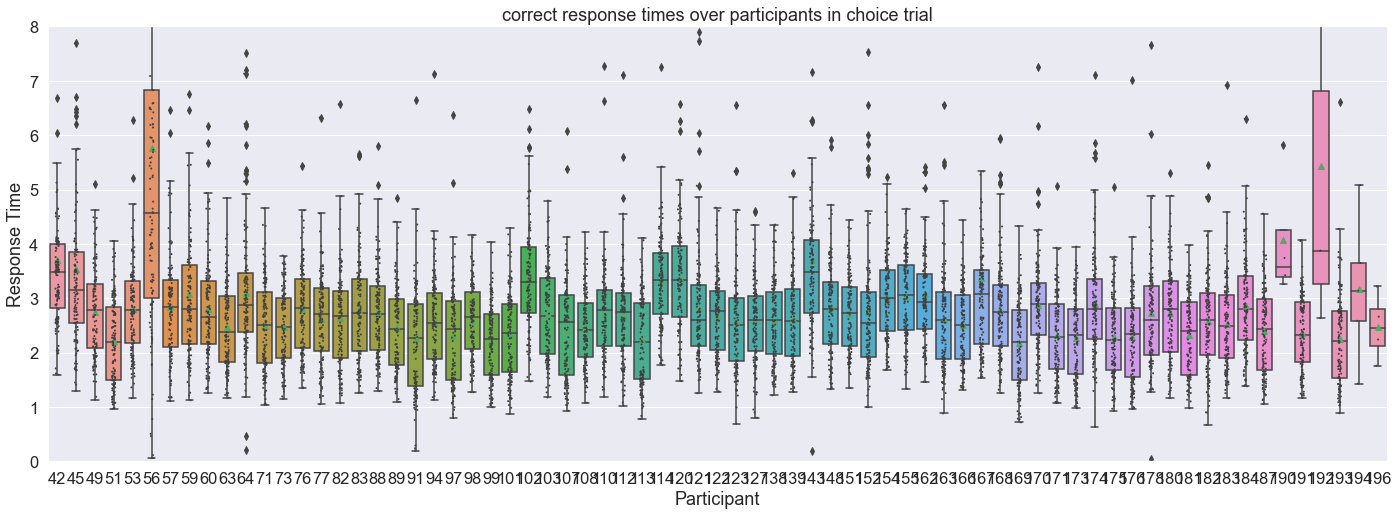

In [75]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(24, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.boxplot(y='choice_response.rt', 
                 x="participant",
                 data=df_corr,
                showmeans=True)

sns.stripplot(y='choice_response.rt', 
                 x="participant",
                 data=df_corr,
             color=".25",
             size = 2)
ax.set(ylim=(0, 8))

# Change Axis labels:
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('correct response times over participants in choice trial')

plt.savefig("figures/rt_choice_corr_by_participant.png", dpi=300, bbox_inches='tight')

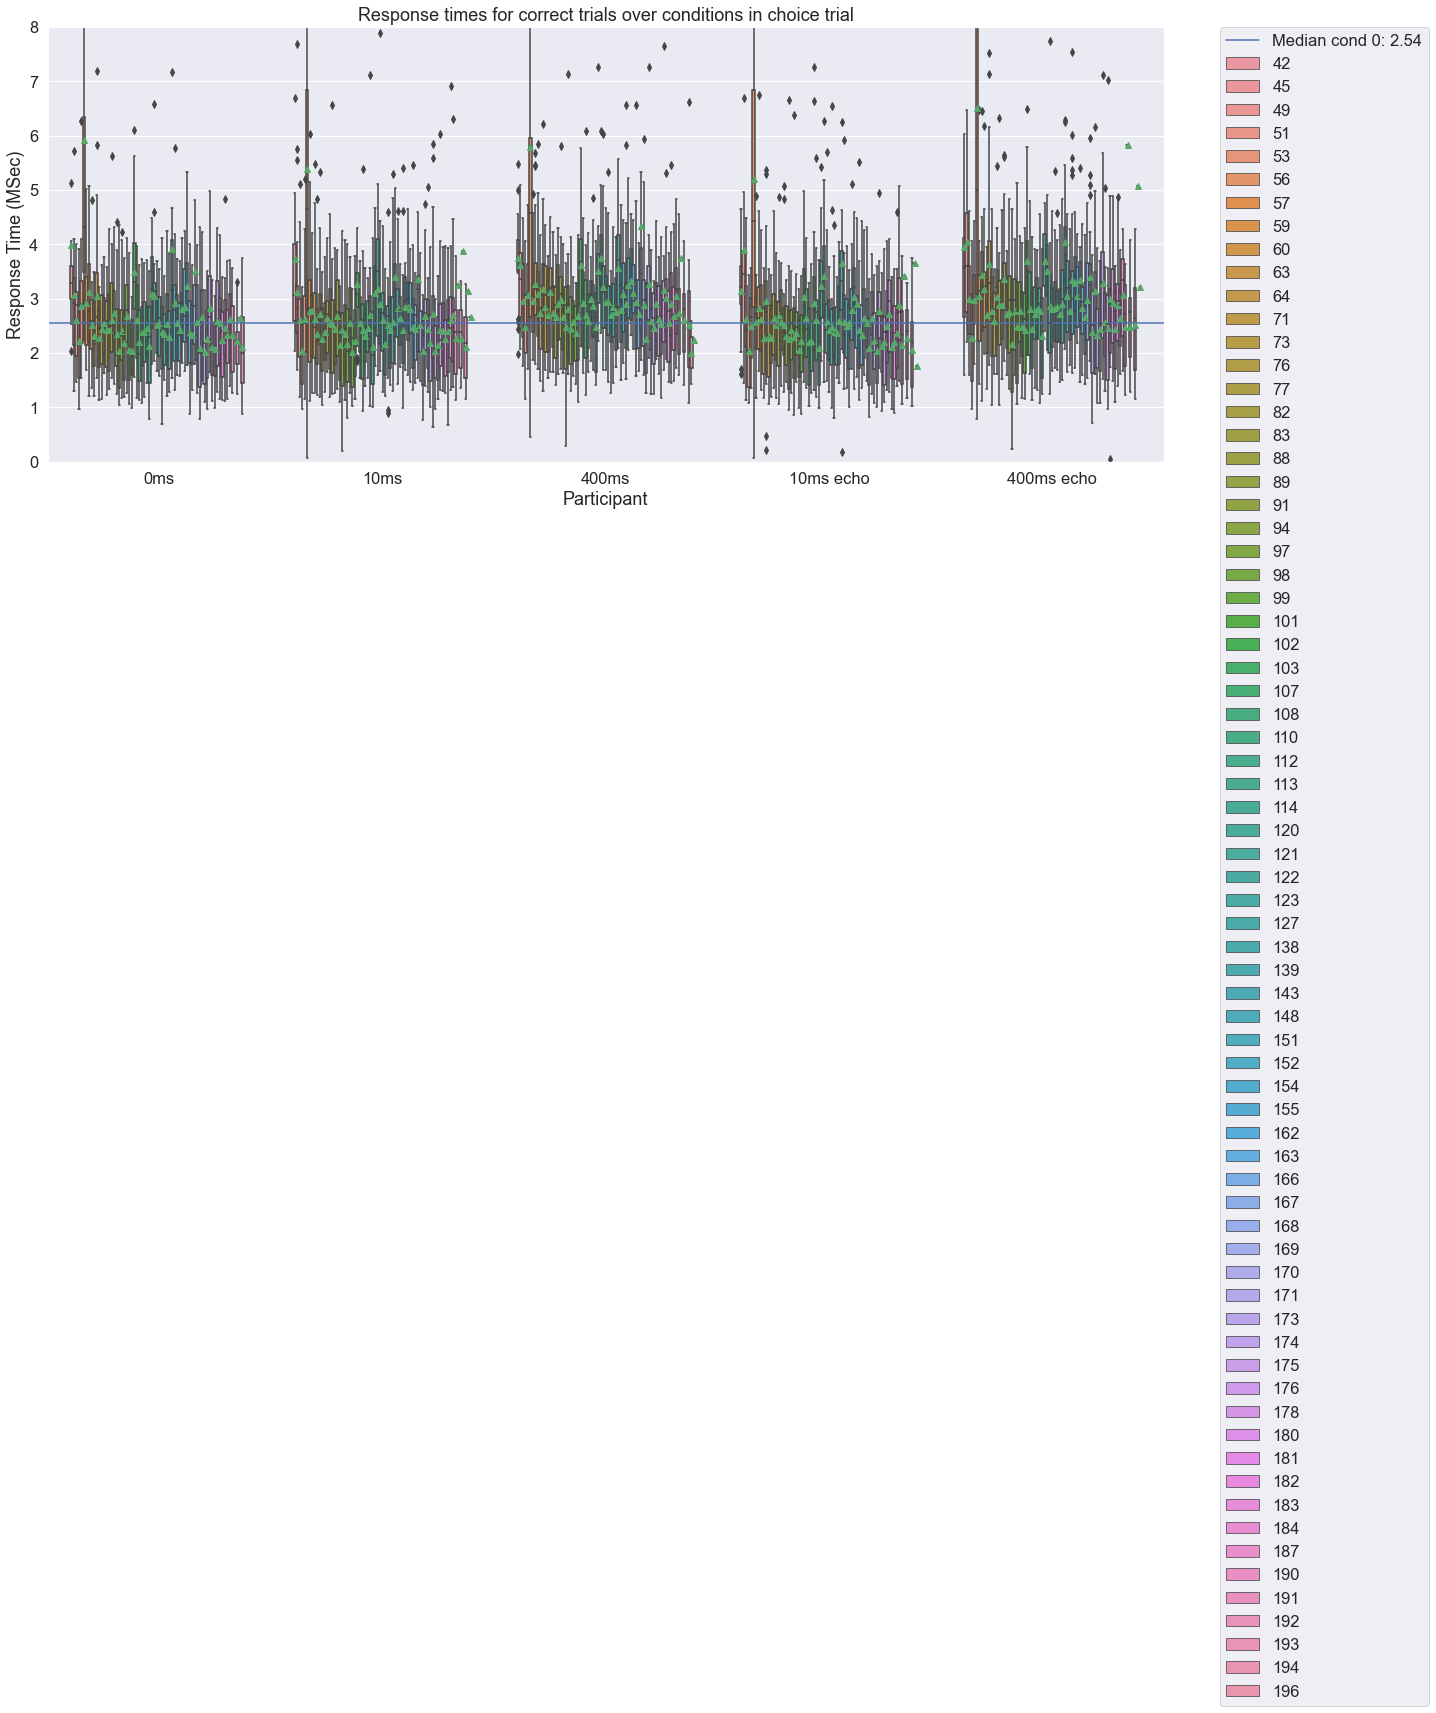

In [76]:
# calculate median rt for cond 0 when correct as baseline
median_cond0 = df_corr.loc[df_corr['cond'] == 0]['choice_response.rt'].median()
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(20, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="cond",
                 hue = "participant",
                 data=df_corr,
                showmeans=True)
ax.axhline(median_cond0, label = 'Median cond 0: ' + str(round(median_cond0,2)))

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 8))
plt.xlabel('Participant')
plt.ylabel('Response Time (MSec)')
plt.title('Response times for correct trials over conditions in choice trial')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/rt_choice_corr_by_participant_condition.png", dpi=300, bbox_inches='tight')

No handles with labels found to put in legend.


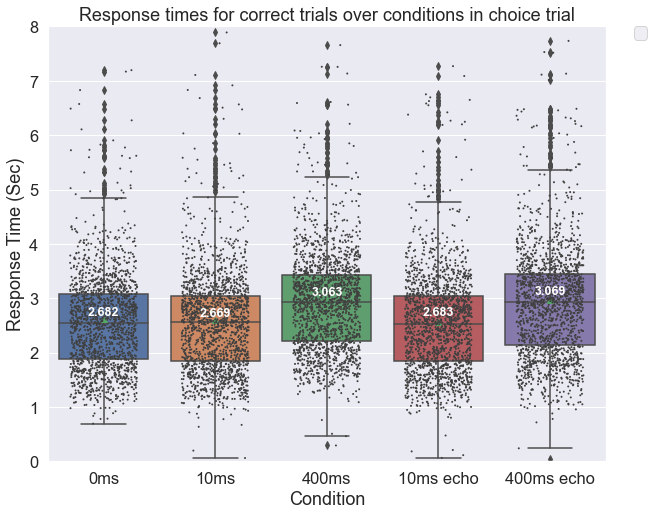

In [77]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="cond",
                 #hue = "participant",
                 data=df_corr,
                 #order = condition_values,
                showmeans=True)
sns.stripplot(y='choice_response.rt', 
                 x="cond",
                 data=df_corr,
             color=".25",
             size = 2,
             jitter = 0.3)

medians = df.groupby(['cond'])['choice_response.rt'].median()
vertical_offset = df['choice_response.rt'].median() * 0.0002 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],3), 
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#results = add_stat_annotation(ax, data=df_corr, y='choice_response.rt', x="cond", test='Mann-Whitney', order = order, box_pairs=[(0, 1)])
#results
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 8))
plt.xlabel('Condition')
plt.ylabel('Response Time (Sec)')
plt.title('Response times for correct trials over conditions in choice trial')

plt.savefig("figures/rt_choice_corr_by_condition.png", dpi=300, bbox_inches='tight')

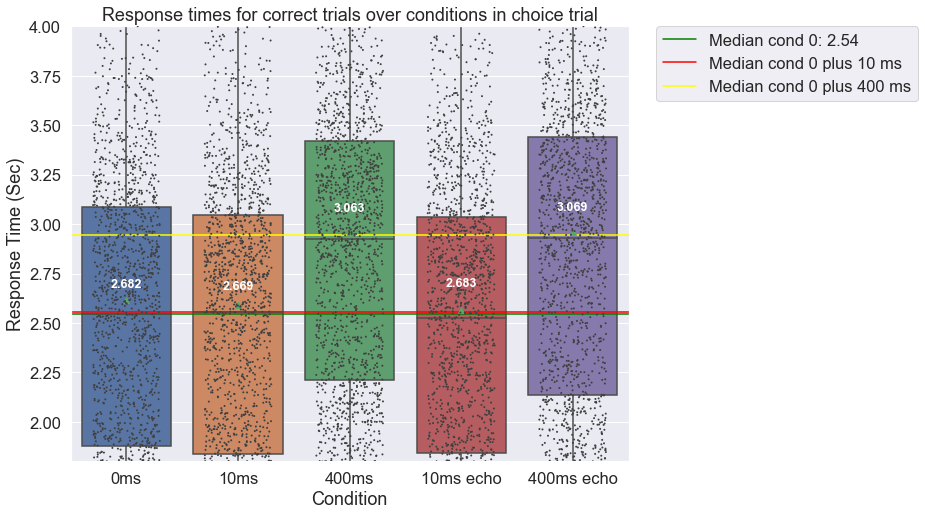

In [78]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="cond",
                 #hue = "participant",
                 data=df_corr,
                 #order = condition_values,
                showmeans=True)
sns.stripplot(y='choice_response.rt', 
                 x="cond",
                 data=df_corr,
             color=".25",
             size = 2,
              jitter = 0.3)

ax.axhline(median_cond0, label = 'Median cond 0: ' + str(round(median_cond0,2)),color = 'green')
ax.axhline(median_cond0 + 0.01, label = 'Median cond 0 plus 10 ms', color = 'red')
ax.axhline(median_cond0 + 0.4, label = 'Median cond 0 plus 400 ms', color = 'yellow')

medians = df.groupby(['cond'])['choice_response.rt'].median()
vertical_offset = df['choice_response.rt'].median() * 0.0002 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],3), 
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#results = add_stat_annotation(ax, data=df_corr, y='choice_response.rt', x="cond", test='Mann-Whitney', order = order, box_pairs=[(0, 1)])
#results
ax.set_xticklabels(condition_values)
ax.set(ylim=(1.8, 4))
plt.xlabel('Condition')
plt.ylabel('Response Time (Sec)')
plt.title('Response times for correct trials over conditions in choice trial')

plt.savefig("figures/rt_choice_corr_by_condition_zoomed.png", dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
#fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.lmplot(y='choice_response.rt',
             x='trials.thisTrialN',
            row = 'participant',
            #data=df
            data = df_corr
               )

ax.set(ylim=(0, 10))


# Change Axis labels:
#plt.legend(loc = 'upper left')

plt.suptitle('RTs over all correctly answered trials')


## Accuracy in choice

In [ ]:
# calculate mean corr
mean_corr = df['choice_response.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(24, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y='choice_response.corr',
                x= 'participant',
                 data=df, 
                  #ci=None
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -50), 
                   textcoords = 'offset points')

ax.axhline(mean_corr, label = 'Mean: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Participant ID')
#plt.ylabel('Count')
plt.title('accuracy over participants in choice trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/choice_corr_by_participant.png", dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y= 'choice_response.corr',
              hue="participant",
                 x = 'cond',
                  ci=None,
              data=df)

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5, label = 'chance level')
ax.set_xticklabels(condition_values)


plt.xlabel('Participant ID')
#plt.ylabel('Count')
plt.title('accuracy over conditions in choice trial for each participant')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/choice_corr_by_participant_by_cond.png", dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y= 'choice_response.corr',
              #hue="participant",
                 x = 'cond',
                  #ci=None,
              data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -50), 
                   textcoords = 'offset points')

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5)
ax.set_xticklabels(condition_values)

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Conditions')
#plt.ylabel('Count')
plt.title('accuracy over conditions in choice trial cumulative')
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/choice_acc_by_cond.png", dpi=300, bbox_inches='tight')

# Analysis of SJ Trial 

We expect people not to be able to detect condition 1 and 3 , so we should see chance level performance
W

## Accuracy in SJ


In [ ]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(24, 16)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.barplot(y= 'response_distortion.corr',
              x="participant",
               ax = axes[0],
                 # ci=None,
              data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -100), 
                   textcoords = 'offset points')
ax.set_title('Distortion')
ax.set_ylabel('Proportion Correct')
ax.set_xlabel('participant ID')
ax.axhline(0.5)
ax.set(ylim=(0, 1))

ax2 = sns.barplot(y= 'response_sync.corr',
              x="participant",
               ax = axes[1],
                #ci=None,
              data=df)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -100), 
                   textcoords = 'offset points')
ax2.set_title('Synchrony')
ax2.set_ylabel('Proportion Correct')
ax2.set_xlabel('participant ID')
ax2.axhline(0.5)
ax2.set(ylim=(0, 1))

plt.suptitle('Correct Ratio over Participants in SJ trial')

plt.savefig("figures/acc_sj_by_participant.png", dpi=300, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(18, 10)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.barplot(y= 'response_distortion.corr',
              hue="participant",
                 x = 'cond',
               ax = axes[0],
                  ci=None,
              data=df)
ax.set_xticklabels(condition_values)
ax.axhline(0.5)
ax.set(ylim=(0, 1))

ax.set_title('Distortion')
ax.set_ylabel('Proportion Correct')
ax.set_xlabel('condition')


ax2 = sns.barplot(y= 'response_sync.corr',
              hue="participant",
                 x = 'cond',
               ax = axes[1],
                ci=None,
              data=df)
ax2.axhline(0.5)
ax2.set(ylim=(0, 1))

ax2.set_xticklabels(condition_values)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.15, 1), loc=1, borderaxespad=0.)


ax2.set_title('Synchrony')
ax2.set_ylabel('Proportion Correct')
ax2.set_xlabel('Condition')
plt.suptitle('accuracy over conditions for each participant in SJ trial')

plt.savefig("figures/acc_sj_by_participant_by_cond.png", dpi=300, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(10, 12)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y= 'response_distortion.corr',
              #hue="participant",
                 x = 'cond',
               ax = axes[0],
                  #ci=None,
              data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 30), 
                   textcoords = 'offset points')
    
ax.set_title('Distortion')
ax.set_ylabel('Proportion Correct')
ax.set_xlabel('Condition')

ax.set_xticklabels(condition_values)
ax.axhline(0.5)
ax.set(ylim=(0, 1))
ax2 = sns.barplot(y= 'response_sync.corr',
              #hue="participant",
                 x = 'cond',
               ax = axes[1],
                #ci=None,
              data=df)

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 30), 
                   textcoords = 'offset points')
ax2.axhline(0.5)
ax2.set(ylim=(0, 1))
ax2.set_xticklabels(condition_values)
ax2.set_title('Synchrony')
ax2.set_ylabel('Proportion Correct')
ax2.set_xlabel('Condition')

plt.suptitle('Correct Ratio over Participants in SJ trial aggregated')

plt.savefig("figures/acc_sj_by_cond.png", dpi=300, bbox_inches='tight')

## RT in SJ
We expect people to take longer, when they are uncertain, so RT should be fastest where performance is highest. 

In [ ]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.boxplot(y='response_distortion.rt', 
                 x="cond",
                 hue = "participant",
                 data=df,
                showmeans=True)

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 8))
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('Response times for distortion question over conditions in sj trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='response_distortion.rt', 
                 x="cond",
                 #hue = "participant",
                 data=df,
                showmeans=True)
ax = sns.stripplot(y='response_distortion.rt', 
                 x="cond",
                 data=df,
             color=".25",
             size = 2)

medians = df.groupby(['cond'])['response_distortion.rt'].median()
vertical_offset = df['response_distortion.rt'].median() * 0.05 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],3), 
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 5))
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('Response times for distortion question over conditions in sj trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='response_sync.rt', 
                 x="cond",
                 #hue = "participant",
                 data=df,
                showmeans=True)
ax = sns.stripplot(y='response_sync.rt', 
                 x="cond",
                 data=df,
             color=".25",
             size = 2)

medians = df.groupby(['cond'])['response_sync.rt'].median()
vertical_offset = df['response_sync.rt'].median() * 0.05 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,
            round(medians[xtick],3), 
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 5))
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('RT for asynchrony question over conditions in sj trial')


In [ ]:
#correctness over items

# calculate mean corr
mean_corr = df['choice_response.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 30)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(x='choice_response.corr',
                y= 'sentence',
                 orient = 'h',
                 data=df_no_filler, 
                 # ci=None
                )

ax.axvline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axvline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.ylabel('Sentence')
#plt.ylabel('Count')
plt.title('correct ratio over each sentence in choice trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/acc_choice_by_sentence.png", dpi=300, bbox_inches='tight')

In [ ]:
#correctness over items

# calculate mean corr
mean_corr = df['response_distortion.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 30)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(x='response_distortion.corr',
                y= 'sentence',
                 orient = 'h',
                 data=df, 
                  #ci=None
                )

ax.axvline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(xlabel="Proportion Correct")
ax.axvline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.ylabel('Sentence')
#plt.ylabel('Count')
plt.title('Mean correctness over sentences in SJ trial, distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/acc_sj_by_sentence_distortion.png", dpi=300, bbox_inches='tight')

In [ ]:
#correctness over items

# calculate mean corr
mean_corr = df['response_sync.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 30)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(x='response_sync.corr',
                y= 'sentence',
                 orient = 'h',
                 data=df, 
                  #ci=None
                )

ax.axvline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axvline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Sentence')
#plt.ylabel('Count')
plt.title('Mean correctness over sentences in SJ trial, synchrony')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("figures/acc_sj_by_sentence_synchrony.png", dpi=300, bbox_inches='tight')